In [1]:
# from pyspark.sql import SQLContext

print (spark.version)

2.2.1


In [2]:
# Load data into Spark dataframe

from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)

inputfile = "file:/home/mhnguyen/projects/teaching/SI2018/scalableML/spark/pyspark/daily_weather.csv"
df = spark.read.load(inputfile, format="csv", inferSchema="true", header="true")

In [3]:
# Examine schema

df.printSchema()

root
 |-- number: integer (nullable = true)
 |-- air_pressure_9am: double (nullable = true)
 |-- air_temp_9am: double (nullable = true)
 |-- avg_wind_direction_9am: double (nullable = true)
 |-- avg_wind_speed_9am: double (nullable = true)
 |-- max_wind_direction_9am: double (nullable = true)
 |-- max_wind_speed_9am: double (nullable = true)
 |-- rain_accumulation_9am: double (nullable = true)
 |-- rain_duration_9am: double (nullable = true)
 |-- relative_humidity_9am: double (nullable = true)
 |-- relative_humidity_3pm: double (nullable = true)



In [4]:
# Show summary statistics

df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
number,1095,547.0,316.24357700987383,0,1094
air_pressure_9am,1092,918.8825513138094,3.184161180386833,907.9900000000024,929.3200000000012
air_temp_9am,1090,64.93300141287072,11.175514003175877,36.752000000000685,98.90599999999992
avg_wind_direction_9am,1091,142.2355107005759,69.13785928889189,15.500000000000046,343.4
avg_wind_speed_9am,1092,5.50828424225493,4.5528134655317185,0.69345139999974,23.554978199999763
max_wind_direction_9am,1092,148.95351796516923,67.23801294602953,28.89999999999991,312.19999999999993
max_wind_speed_9am,1091,7.019513529175272,5.598209170780958,1.1855782000000479,29.84077959999996
rain_accumulation_9am,1089,0.20307895225211126,1.5939521253574893,0.0,24.01999999999907
rain_duration_9am,1092,294.1080522756142,1598.0787786601481,0.0,17704.0


In [5]:
# Get number of rows

df.count()

1095

In [6]:
# Display first two rows

df.show(2)

+------+-----------------+-----------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|number| air_pressure_9am|     air_temp_9am|avg_wind_direction_9am|avg_wind_speed_9am|max_wind_direction_9am|max_wind_speed_9am|rain_accumulation_9am|rain_duration_9am|relative_humidity_9am|relative_humidity_3pm|
+------+-----------------+-----------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|     0|918.0600000000087|74.82200000000041|                 271.1| 2.080354199999768|    295.39999999999986| 2.863283199999908|                  0.0|              0.0|    42.42000000000046|   36.160000000000494|
|     1|917.3476881177097|71.40384263106537|    101.93517935618371|2.4430092157340217|    140.47154847112498|3.5333236016106238|                  0.

In [7]:
# Display column names

df.columns

['number',
 'air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'relative_humidity_3pm']

In [8]:
# Get number of columns

len(df.columns)

11

In [9]:
# Calculate correlation

df.stat.corr('air_temp_9am', 'relative_humidity_9am')

-0.5366700581231807

In [10]:
# Show plots in notebook

%matplotlib inline

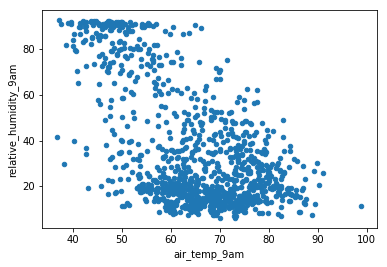

In [11]:
# Scatter plot of humidity vs air temperature

# df.select('air_temp_9am', 'relative_humidity_9am').toPandas().plot.scatter(x='air_temp_9am', y='relative_humidity_9am')
df.select('air_temp_9am', 'relative_humidity_9am').toPandas().plot(kind='scatter', x='air_temp_9am', y='relative_humidity_9am')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b3813113208>]], dtype=object)

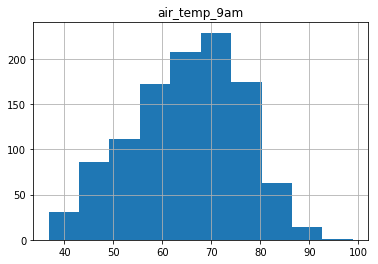

In [12]:
# Histogram of wind speed

df.select('air_temp_9am').toPandas().hist()